# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [44]:
# cities2 = ['touros', 'saint anthony', 'san patricio']

# set up lists to hold reponse info -- append to it in the loop below
name = []
lat = []
long = []
temp = []
wind = []
humid = []
clouds = []
country = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        print(f"Processing record: {city}.")
    except:
        # Append null values
        print(f"City: {city} was mot found. Skipping...")
#         print("City not found skipping")
        pass


Processing record: ribeira grande.
Processing record: busselton.
Processing record: jinchang.
Processing record: lock haven.
Processing record: rikitea.
Processing record: tabou.
Processing record: thompson.
Processing record: loikaw.
Processing record: kapaa.
Processing record: mataura.
Processing record: khatanga.
Processing record: kodiak.
Processing record: rawson.
Processing record: mar del plata.
Processing record: cacequi.
Processing record: biak.
Processing record: bredasdorp.
Processing record: provideniya.
Processing record: vitry-le-francois.
Processing record: ushuaia.
Processing record: dikson.
Processing record: nikolskoye.
Processing record: artyom.
Processing record: chaparral.
Processing record: port alfred.
Processing record: ambilobe.
Processing record: narsaq.
Processing record: bantry.
Processing record: longyearbyen.
Processing record: vaini.
Processing record: atuona.
Processing record: avarua.
Processing record: souillac.
Processing record: mbuji-mayi.
Processin

Processing record: rocha.
City: babanusah was mot found. Skipping...
Processing record: san patricio.
Processing record: potiskum.
Processing record: chapais.
Processing record: paoua.
Processing record: lubbock.
Processing record: santa vitoria do palmar.
Processing record: yenagoa.
City: kamenskoye was mot found. Skipping...
Processing record: laguna.
Processing record: price.
Processing record: todos santos.
Processing record: bambanglipuro.
Processing record: mpanda.
City: sorvag was mot found. Skipping...
Processing record: conceicao da barra.
Processing record: half moon bay.
City: karkaralinsk was mot found. Skipping...
Processing record: haines junction.
Processing record: bilibino.
Processing record: aden.
Processing record: carauari.
Processing record: nouadhibou.
Processing record: broome.
Processing record: jieshi.
Processing record: vostok.
Processing record: north bend.
Processing record: ndago.
Processing record: sobolevo.
Processing record: ignacio zaragoza.
Processing 

Processing record: isangel.
Processing record: hervey bay.
Processing record: cidreira.
City: yanan was mot found. Skipping...
Processing record: kiama.
Processing record: zhoucheng.
Processing record: xai-xai.
City: puerto pinasco was mot found. Skipping...
Processing record: itarema.
Processing record: trinidad.
Processing record: kaeo.
Processing record: paka.
Processing record: sao felix do xingu.
Processing record: mehamn.
Processing record: qasigiannguit.
Processing record: atasu.
Processing record: dicabisagan.
Processing record: ostersund.
Processing record: makat.
Processing record: buluang.
Processing record: tual.
Processing record: praia da vitoria.
Processing record: yarada.
Processing record: bursa.
Processing record: sayyan.
Processing record: lorengau.
Processing record: idah.
Processing record: dehloran.
Processing record: viedma.
Processing record: karratha.
Processing record: coahuayana.
Processing record: reading.
Processing record: chadiza.
Processing record: mayo.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# create a data frame from cities, lat, and temp -- dictionary to a pd.DataFrame
weather_dict = {
    "city": name,
    "lat": lat,
    "lon": long,
    "temp": temp,
    "humidity": humid,
    "wind": wind,
    "cloudiness": clouds,
    "country": country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(100)

,city,lat,lon,temp,humidity,wind,cloudiness,country
0,Ribeira Grande,38.52,-28.70,74.10,90,11.90,10,PT
1,Busselton,-33.65,115.33,58.15,65,4.50,99,AU
2,Jinchang,38.50,102.17,75.06,29,10.71,97,CN
3,Lock Haven,41.14,-77.45,87.01,43,3.00,45,US
4,Rikitea,-23.12,-134.97,72.27,77,18.07,96,PF
...,...,...,...,...,...,...,...,...
95,Quryq,43.20,51.65,80.15,24,15.43,72,KZ
96,Sitka,57.05,-135.33,62.60,72,5.95,75,US
97,Nhulunbuy,-12.23,136.77,75.20,53,16.11,87,AU
98,Hearst,49.68,-83.67,61.74,88,7.16,99,CA


In [46]:
weather_data.to_csv('Datafolder/weather_data_df.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
weather_data.dtypes

city           object
lat           float64
lon           float64
temp          float64
humidity        int64
wind          float64
cloudiness      int64
country        object
dtype: object

In [48]:
#  Get the indices of cities that have humidity over 100%.
ind_humidity = weather_data.index[weather_data["humidity"]>100]
ind_humidity

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
                            
# No observations with Humidity over 100

In [ ]:
# Extract relevant fields from the data frame
#no need as there was nothing cleaned up

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

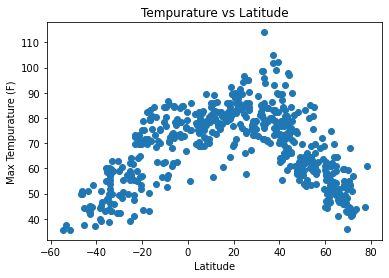

In [49]:
## Convert to floats and store Latitude and Tempurature as x and y values
x_values = weather_data['lat']
y_values = weather_data['temp']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Tempurature vs Latitude')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

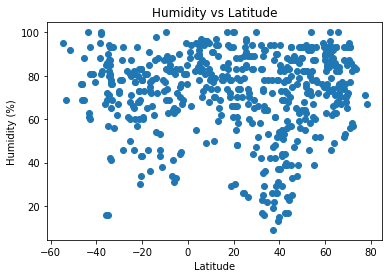

In [50]:
## Convert to floats and store Latitude and Humidty as x and y values
x_values = weather_data['lat']
y_values = weather_data['humidity']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

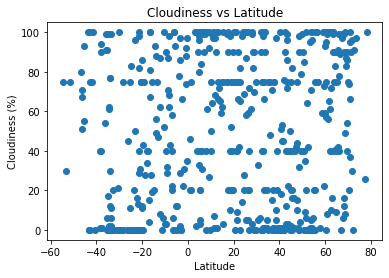

In [51]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = weather_data['lat']
y_values = weather_data['cloudiness']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

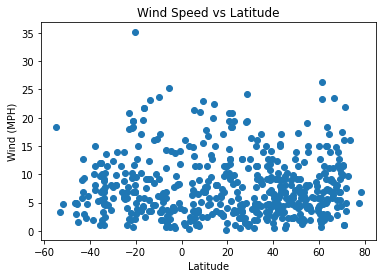

In [52]:
## Convert to floats and store Latitude and wind as x and y values
x_values = weather_data['lat']
y_values = weather_data['wind']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Wind Speed vs Latitude')

# Show plot
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.45348453968398134


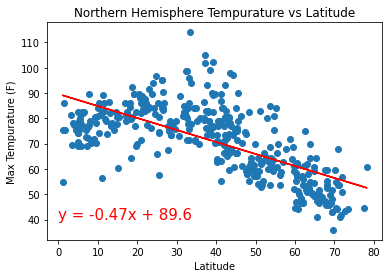

In [54]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Northern Hemisphere Tempurature vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6095648822072247


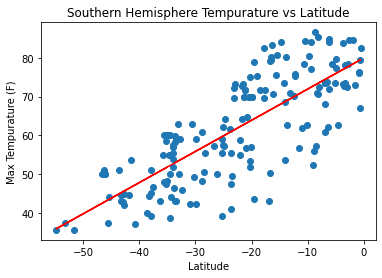

In [55]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Southern Hemisphere Tempurature vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0013518928086279978


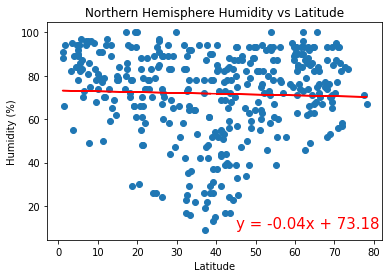

In [56]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.01802046106351175


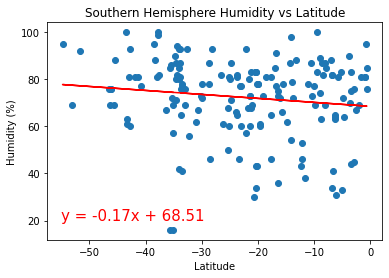

In [57]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 2.3015641999082077e-06


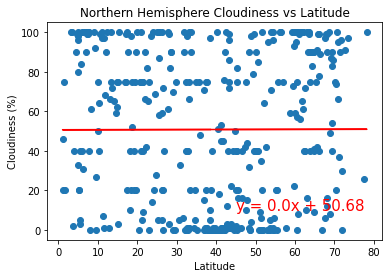

In [58]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.001695200244132761


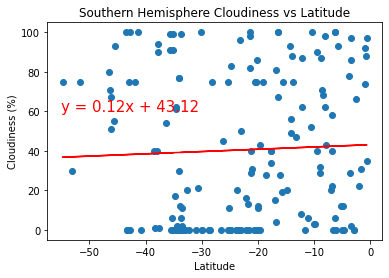

In [59]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00013550221884712065


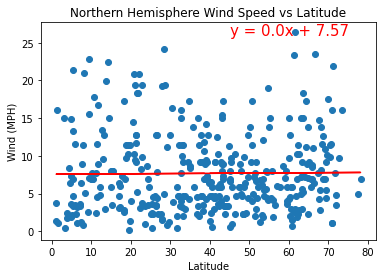

In [60]:
## Convert to floats and store Latitude and Wind as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,26),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Northern Hemisphere Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0032401489561075213


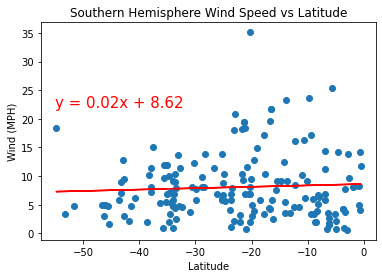

In [61]:
## Convert to floats and store Latitude and Wind as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Southern Hemisphere Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

3 Observations:
1. It appears that Wind Speed and Cloudiness are not really affected by latitude (how far away from the equator they are. There is no real strong correlation and the regression lines are pretty flat.

2. As expected the Max Temp for the Northern Hemisphere has a negative slope and there is a pretty good correlation between the latitude and the Max Temp. The same can be said for the Southern Hemisphere except it is a positive slope.

3. When we plotted them all together at the start you could see a peak for the Max Temp that conveyed that on one side of that peak was the southern hemisphere and the other side was the northern hemisphere. You could start to see the relationship at that point.